In [1]:
using Distributions, TimeIt, ProgressMeter, PyPlot, JLD
include("/home/postdoc/dsen/Desktop/codes/G-ZZ_clean/jl_files/zz_samplers.jl")
include("temp.jl")

run_sampler (generic function with 4 methods)

In [3]:
X, y = load("shrinkage_data_2.7.jld", "X", "y")
d, Nobs = size(X)
σ02 = 1
my_pr = SS_prior(d, σ02)
my_ll = ll_logistic_sp(X,y)
my_model = model(my_ll, my_pr)
print("d = ",  d, ", N = ", Nobs)

d = 101, N = 700

### GZZ:

In [4]:
# Sub-sampling without control variates and with weights:
mb_size = 1
max_attempts = 10^7
lambda = 2e1
Print = true;

In [5]:
start = time()
run_sampler(my_model, lambda, max_attempts, mb_size, Print) 
print("Sampling in ", round((time()-start)/60,1), " mins \n")

10 percent attempts in 63.47 min; zz bounces = 216727, hyp bounces = 4037, total time of process = 198.713 
20 percent attempts in 129.96 min; zz bounces = 431869, hyp bounces = 8028, total time of process = 398.072 
30 percent attempts in 198.05 min; zz bounces = 646146, hyp bounces = 12051, total time of process = 597.155 
40 percent attempts in 265.48 min; zz bounces = 861765, hyp bounces = 15985, total time of process = 796.416 
50 percent attempts in 330.69 min; zz bounces = 1076928, hyp bounces = 19906, total time of process = 995.827 
60 percent attempts in 399.05 min; zz bounces = 1292054, hyp bounces = 24112, total time of process = 1195.245 
70 percent attempts in 480.75 min; zz bounces = 1505330, hyp bounces = 28184, total time of process = 1394.776 
80 percent attempts in 555.35 min; zz bounces = 1716530, hyp bounces = 32127, total time of process = 1594.161 
90 percent attempts in 626.70 min; zz bounces = 1929169, hyp bounces = 36035, total time of process = 1793.473 
100 

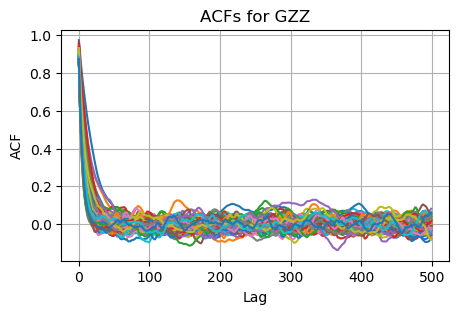

In [6]:
fig = figure("pyplot_barplot",figsize=(5,3))
n_samples = 10^4
maxlag_gzz = 500
acfs_gzz = zeros(d,maxlag_gzz)
discard = 0
filename  = "/xtmp/GZZ_data/shrinkage_prior/synthetic_data/lambda:"*string(lambda)*
            "-d:"*string(d)*"-Nobs:"*string(Nobs)*"-mb_size:"*string(mb_size)*".jld"
xt_skel, bt_skel = load(filename, "xt_skeleton", "bt_skeleton")
xi_samples_gzz = extract_samples(xt_skel[:,discard+1:end], 
                             bt_skel[:,discard+1:end], 
                            (bt_skel[end]-bt_skel[discard+1])/n_samples,
                            "linear")[:,1:end-1]
iacts_gzz = zeros(size(xi_samples_gzz,1))
for dim in 1:size(xi_samples_gzz,1)
    a = acf(xi_samples_gzz[dim,:],maxlag_gzz)
    plot(a)
    acfs_gzz[dim,:] = a
end
title("ACFs for GZZ")
xlabel("Lag")
ylabel("ACF")
grid(true)
xt_skel, bt_skel, xi_samples = [], [], []
gc()